</br>
<font size="12">PCA and population structure with called genotypes</font>


# PCA for wildebeest

Again we will use data from the Blue Wildebeest. To simply the the analysis we have included only on of the Brindles populations ( B-Etosha). 

<img src="https://raw.githubusercontent.com/popgenDK/popgenDK.github.io/gh-pages/images/slider/wildeBeastMap.png" alt="image info" />


#  PCA for low depth sequencing using pcangsd (integrated into PCAone)


# Setup enviroment

In [1]:
# shared tools and data folder
source /home/student/USER/miniconda.sh
conda activate anders
TOOL_PATH=/home/student/opt/anders # for standalone tool script including java package
SHARED_PATH=/home/tch_wyd/myname/shared # For reference database
INPUT_PATH=/home/tch_wyd/myname/inputs/pca  # for input data

(base) (anders) (anders) (anders) (anders) 


In [2]:
mkdir -p ~/sysu_day4_pca

cd ~/sysu_day4_pca

cp -sf ${SHARED_PATH}/pca_*.json .
cp -sf ${SHARED_PATH}/visFuns.R .
cp -sf ${SHARED_PATH}/newPlotPlink.R .

(anders) (anders) (anders) (anders) (anders) (anders) (anders) 


In [3]:
# set up R working space
work_d <- path.expand("~/sysu_day4_pca")
setwd(work_d)

source("./visFuns.R")
source("./newPlotPlink.R")

In [4]:
# set up python working space
import os
work_d = os.path.expanduser("~/sysu_day4_pca")
os.chdir(work_d)

# Software and data



### Software
We will be using plink, PCAone for this exercise. First lets see if the software is installed and get the data

In [5]:
echo --programs that are installed:--
which plink
which PCAone

#make folder if it does not exist already
mkdir -p ~/sysu_day4_pca/pca2

# enter folder
cd ~/sysu_day4_pca/

# make links to files and add them to the folder
cp -sf ${INPUT_PATH}/blue_wildebeest_thin* ./pca2/
cp -r -sf  ${INPUT_PATH}/multiRunK7 ./pca2/

echo --- files in folder ---
ls ./pca2/


--programs that are installed:--
(anders) /home/student/miniconda3/envs/anders/bin/plink
(anders) /home/student/miniconda3/envs/anders/bin/PCAone
(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) --- files in folder ---
(anders) blue_wildebeest_noLD.bed       blue_wildebeest_thin.log
blue_wildebeest_noLD.bim       blue_wildebeest_thin.nosex
blue_wildebeest_noLD.eigvals   multiRunK7
blue_wildebeest_noLD.eigvecs   pcaone.eigvals
blue_wildebeest_noLD.eigvecs2  pcaone.eigvecs
blue_wildebeest_noLD.fam       pcaone.eigvecs2
blue_wildebeest_noLD.log       pcaone.ld.prune.in
blue_wildebeest_noLD.nosex     pcaone.ld.prune.out
blue_wildebeest_thin.bed       pcaone.log
blue_wildebeest_thin.bim       pcaone.residuals
blue_wildebeest_thin.eigvals   plink.log
blue_wildebeest_thin.eigvecs   plink.mdist
blue_wildebeest_thin.eigvecs2  plink.mdist.id
blue_wildebeest_thin.fam       plink.nosex
(anders) 


Let perform PCA on the whole data (without LD pruning). 

We will use PCAone first:



In [6]:
PCAone

PCA All In One (v0.4.4)        https://github.com/Zilong-Li/PCAone
(C) 2021-2024 Zilong Li        GNU General Public License v3

Usage: use plink files as input and apply default window-based RSVD method
       PCAone --bfile plink -m 2 -n 20 

       use csv file as input and apply the Implicitly Restarted Arnoldi Method
       PCAone --csv csv.zst --svd 0 -m 2 -n 20 

Main options:
  -h, --help                     print all options including hidden advanced options
  -d, --svd arg (=2)             svd method to be applied. default 2 is recommended for big data.
                                 0: the Implicitly Restarted Arnoldi Method (IRAM)
                                 1: the Yu's single-pass Randomized SVD with power iterations
                                 2: the proposed window-based Randomized SVD method
                                 3: the full Singular Value Decomposition.
  -b, --bfile arg                prefix to PLINK .bed/.bim/.fam files
  -B, --binary arg      

Shows the options. To run it use the following command

In [7]:

PCAone  -b ./pca2/blue_wildebeest_thin -o ./pca2/blue_wildebeest_thin -n 2

Machine name: x86_64
Node name: a6000-gpu1
Operating system release: 4.18.0-372.9.1.el8.x86_64
Operating system version: #1 SMP Tue May 10 14:48:47 UTC 2022
Operating system name: Linux
PCAone (v0.4.4)    https://github.com/Zilong-Li/PCAone
Options in effect:
/home/student/miniconda3/envs/anders/bin/PCAone.avx2 -b ./pca2/blue_wildebeest_thin -o ./pca2/blue_wildebeest_thin -n 2 
[24/07/2025-15:53:43] program started
[24/07/2025-15:53:43] start parsing PLINK format
[24/07/2025-15:53:43] N samples is 73. M snps is 990980
[24/07/2025-15:53:43] begin to run PCAone RSVD with in-core mode
[24/07/2025-15:53:43] running in memory mode with PCAone (algorithm2).
[24/07/2025-15:53:47] running of epoch=1, diff=0.167724
[24/07/2025-15:53:48] running of epoch=2, diff=0.0300942
[24/07/2025-15:53:50] running of epoch=3, diff=0.0560784
[24/07/2025-15:53:51] running of epoch=4, diff=0.0584323
[24/07/2025-15:53:53] running of epoch=5, diff=0.0526258
[24/07/2025-15:53:55] running of epoch=6, diff=2.14958e-

 - look at the above output. How many SNPs and how many individuals?
 
 The default is to calculate the top 10 PCs. If you want more you can use the option --pc <INT> to choose a different number. However, let see what the top PCs capture. 
    
First let look the two first PCs as well as the admixture proportions


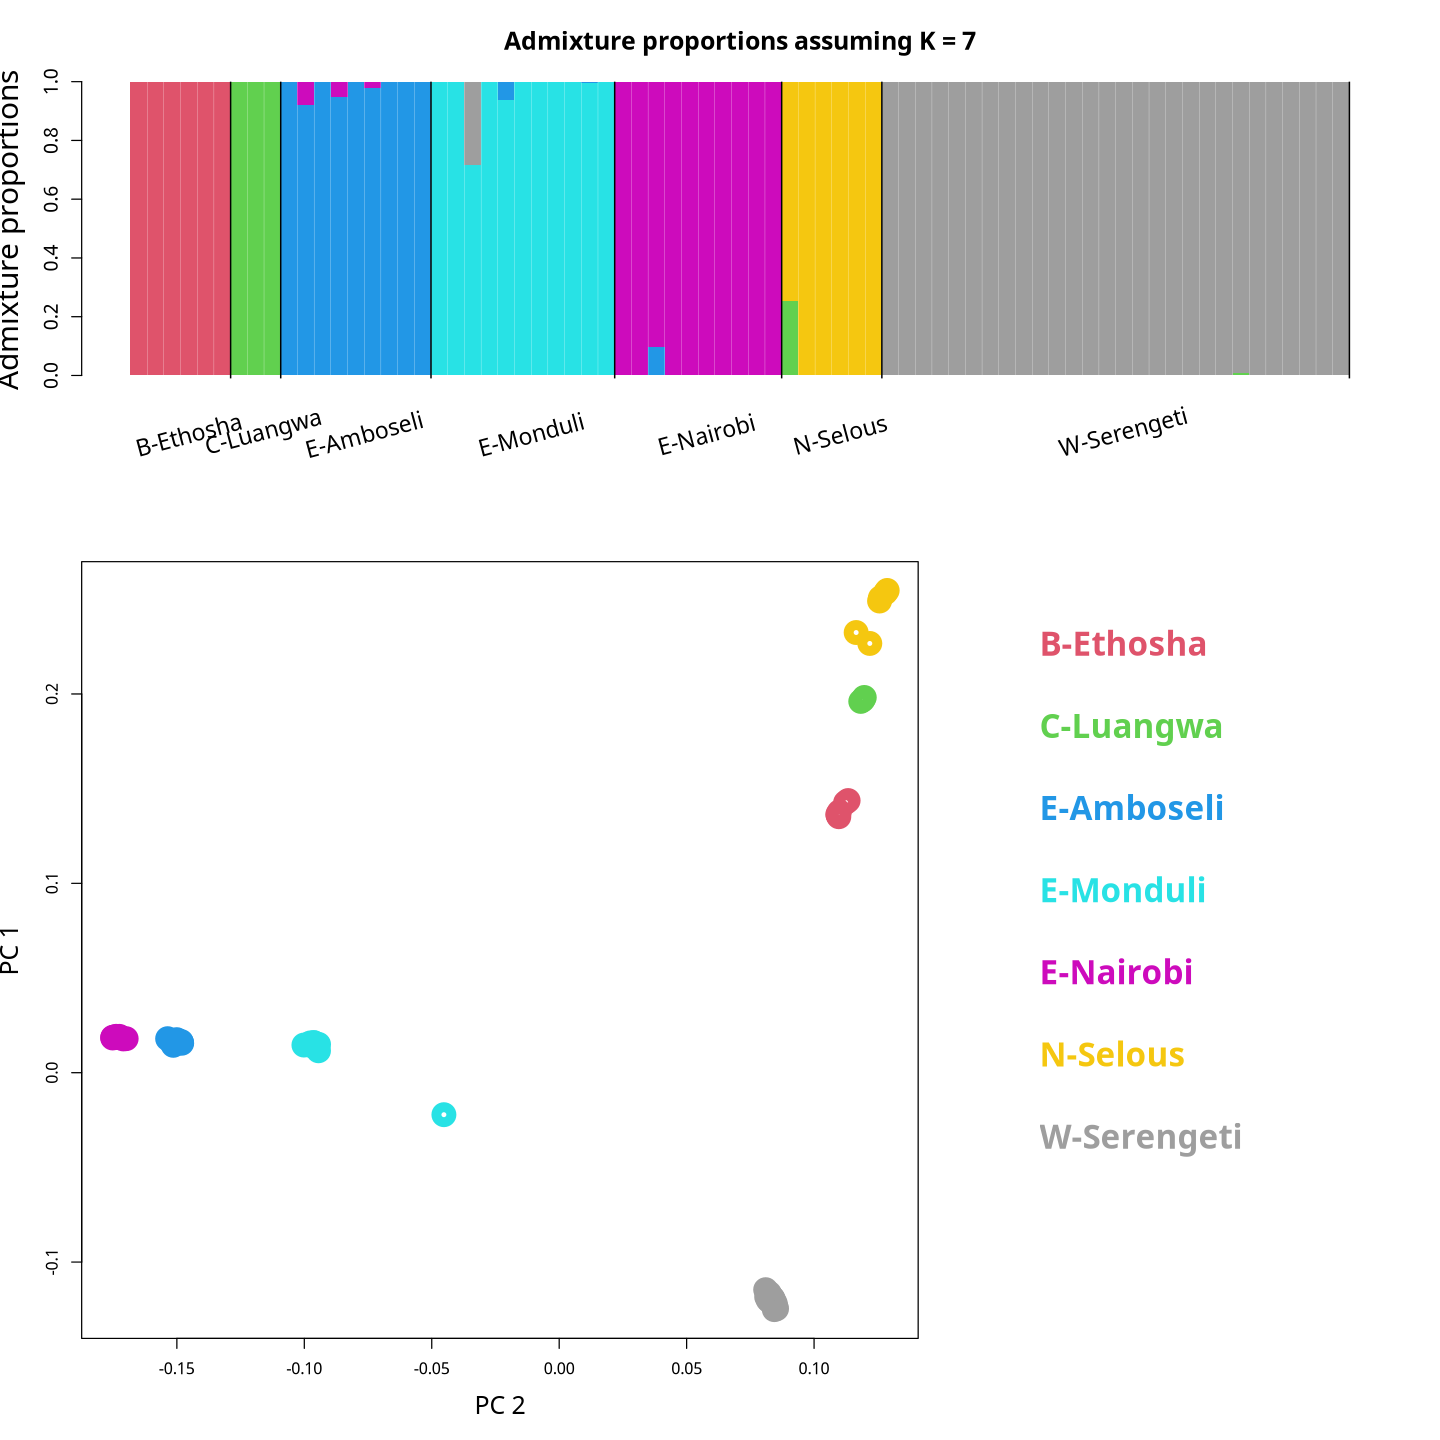

In [8]:
#read in code to plot admixture proportions ( plotAdmix function)
#source("https://raw.githubusercontent.com/GenisGE/evalAdmix/master/visFuns.R")

options(repr.plot.width=12, repr.plot.height=12)
layout(matrix(c(1,1,2,3),nrow=2,by=T),height=c(2,4),width=2:1)

# Read in inferred admixture proportions
q <- read.table("./pca2/multiRunK7/blue_wildebeest_noLD.7.Q_4")

#read in the population labels (first column of fam file)
tab <- table(pop <- read.table("./pca2/blue_wildebeest_thin.fam")[,1])

#make the plot. 
plotAdmix(q,pop=pop,rotatelab=15,padj=0.15,cex.lab=1.4,col=c(3,5,8,4,2,6,7))


pca <- read.table("./pca2/blue_wildebeest_thin.eigvecs")
#layout(matrix(1:2,nrow=1),w=c(4,2))
plot(pca[,1:2],col=as.integer(as.factor(pop))+1,ylab=paste("PC",1),xlab=paste("PC",2),cex.lab=1.5,cex=2,lwd=8)
plot.new()
legend("top",legend=names(tab),bty="n",xpd=T,cex=2,text.col=1:length(tab)+1,text.font=2)


 - What information do you get from the PCA that you don't get from the ADMIXTURE results?
 - Can you identify the admixed individuals?
 
 
 Lets see what the other PCs show. 
 

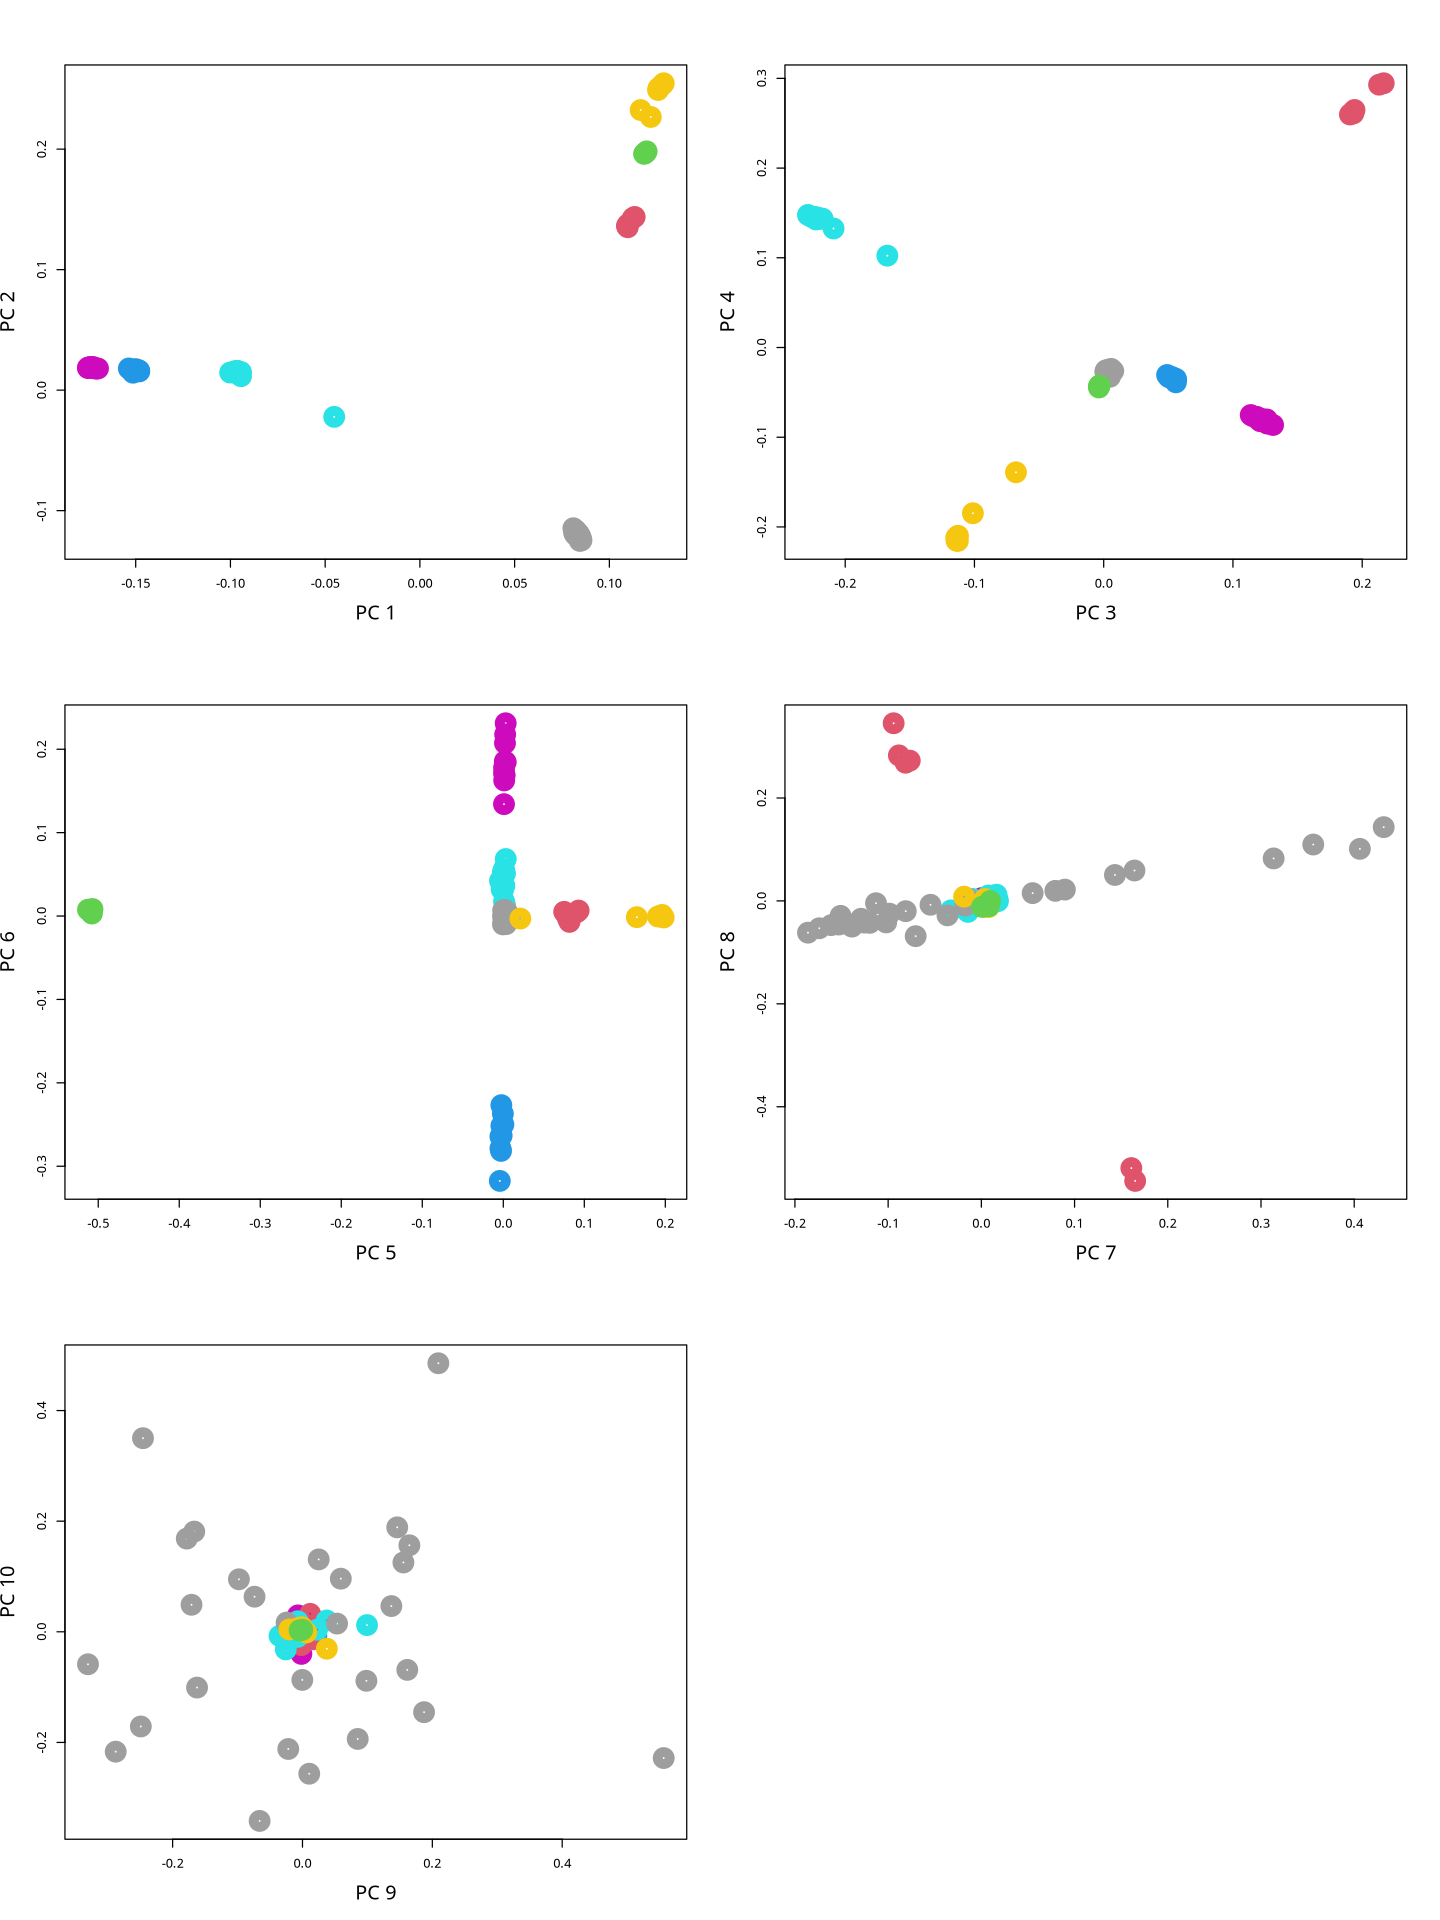

In [18]:
options(repr.plot.width=12, repr.plot.height=16)

par(mfrow=c(3,2))
for(pc in 0:4)
    plot(pca[,pc*2+1:2],col=as.integer(as.factor(pop))+1,ylab=paste("PC",pc*2+2),xlab=paste("PC",pc*2+1),cex.lab=1.5,cex=2,lwd=8)


 - How many PCs are used to separate the populations?
 - What do you think is captured on PC 7 and 8?
 - What  do you think is captures on PC 9 and 10?
 

## Bonus exercise if there is time


Lets try to run the PCA after pruning LD (linkage disequillibrium) from the data. The noLD data was created in the admixture exercise. 
Run first the pruning with PCA  and then run PCA on the pruned data

In [10]:
ls ./pca2

blue_wildebeest_noLD.bed       blue_wildebeest_thin.log
blue_wildebeest_noLD.bim       blue_wildebeest_thin.nosex
blue_wildebeest_noLD.eigvals   multiRunK7
blue_wildebeest_noLD.eigvecs   pcaone.eigvals
blue_wildebeest_noLD.eigvecs2  pcaone.eigvecs
blue_wildebeest_noLD.fam       pcaone.eigvecs2
blue_wildebeest_noLD.log       pcaone.ld.prune.in
blue_wildebeest_noLD.nosex     pcaone.ld.prune.out
blue_wildebeest_thin.bed       pcaone.log
blue_wildebeest_thin.bim       pcaone.residuals
blue_wildebeest_thin.eigvals   plink.log
blue_wildebeest_thin.eigvecs   plink.mdist
blue_wildebeest_thin.eigvecs2  plink.mdist.id
blue_wildebeest_thin.fam       plink.nosex
(anders) 


In [11]:

PCAone -b ./pca2/blue_wildebeest_thin -k 6 --ld-stats 0 --ld-r2 0.1 --ld-bp 1000000 -n 2 -o ./pca2/pcaone

echo --number of variants to be keept --
wc -l ./pca2/pcaone.ld.prune.in
 
echo -e "\n --Extract variants using plink --"
plink --bfile ./pca2/blue_wildebeest_thin --extract ./pca2/pcaone.ld.prune.in --make-bed --out ./pca2/blue_wildebeest_noLD  --chr-set 29 --threads 2


Machine name: x86_64
Node name: a6000-gpu1
Operating system release: 4.18.0-372.9.1.el8.x86_64
Operating system version: #1 SMP Tue May 10 14:48:47 UTC 2022
Operating system name: Linux
PCAone (v0.4.4)    https://github.com/Zilong-Li/PCAone
Options in effect:
/home/student/miniconda3/envs/anders/bin/PCAone.avx2 -b ./pca2/blue_wildebeest_thin -k 6 --ld-stats 0 --ld-r2 0.1 --ld-bp 1000000 -n 2 -o ./pca2/pcaone 
[24/07/2025-15:53:55] program started
[24/07/2025-15:53:55] start parsing PLINK format
[24/07/2025-15:53:55] N samples is 73. M snps is 990980
[24/07/2025-15:53:56] begin to run PCAone RSVD with in-core mode
[24/07/2025-15:53:56] running in memory mode with PCAone (algorithm2).
[24/07/2025-15:53:58] running of epoch=1, diff=0.0365785
[24/07/2025-15:53:59] running of epoch=2, diff=0.000345445
[24/07/2025-15:54:00] running of epoch=3, diff=0.000289142
[24/07/2025-15:54:02] running of epoch=4, diff=7.48945e-05
PCAone converged but continues running to get S and V.
[24/07/2025-15:54:0

In [12]:
PCAone  -b ./pca2/blue_wildebeest_noLD -n 2 -o ./pca2/blue_wildebeest_noLD

Machine name: x86_64
Node name: a6000-gpu1
Operating system release: 4.18.0-372.9.1.el8.x86_64
Operating system version: #1 SMP Tue May 10 14:48:47 UTC 2022
Operating system name: Linux
PCAone (v0.4.4)    https://github.com/Zilong-Li/PCAone
Options in effect:
/home/student/miniconda3/envs/anders/bin/PCAone.avx2 -b ./pca2/blue_wildebeest_noLD -n 2 -o ./pca2/blue_wildebeest_noLD 
[24/07/2025-15:54:10] program started
[24/07/2025-15:54:10] start parsing PLINK format
[24/07/2025-15:54:10] N samples is 73. M snps is 146632
[24/07/2025-15:54:10] begin to run PCAone RSVD with in-core mode
[24/07/2025-15:54:10] running in memory mode with PCAone (algorithm2).
[24/07/2025-15:54:11] running of epoch=1, diff=0.189282
[24/07/2025-15:54:11] running of epoch=2, diff=0.0820248
[24/07/2025-15:54:11] running of epoch=3, diff=0.0862426
[24/07/2025-15:54:12] running of epoch=4, diff=0.044626
[24/07/2025-15:54:12] running of epoch=5, diff=0.143128
[24/07/2025-15:54:12] running of epoch=6, diff=3.4336e-05



We can start by comparing the eigenvalue. These are proportional to the variance explained so that higher values means that the corresponding PC captures more information about the data. 

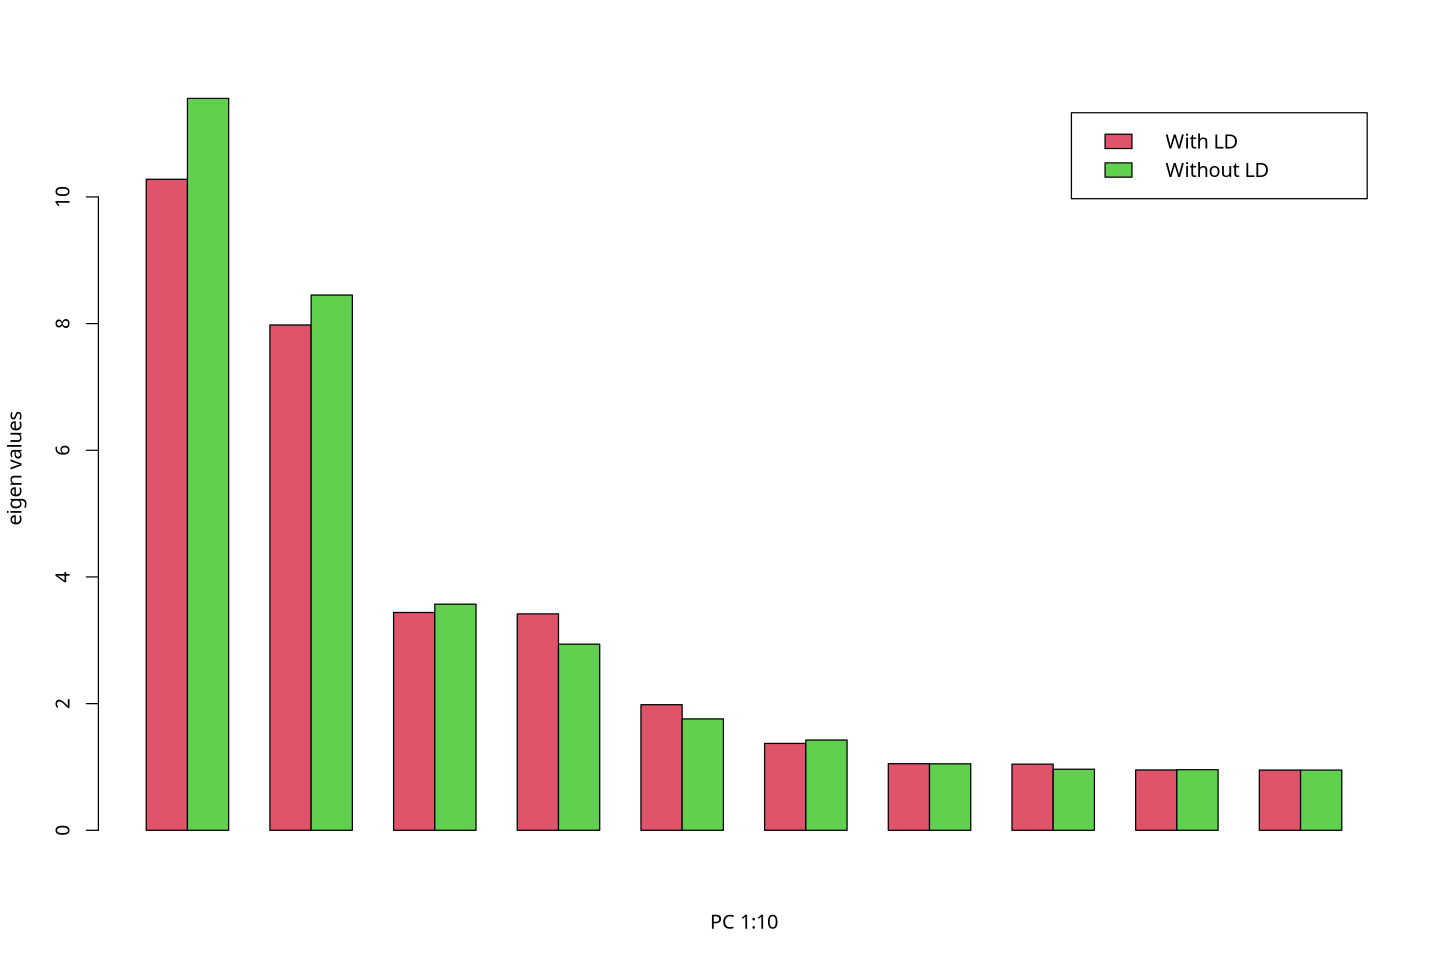

Read 10 items
Read 10 items


In [13]:
options(repr.plot.width=12, repr.plot.height=8)

eigen <- scan("./pca2/blue_wildebeest_thin.eigvals")
eigenNoLD <- scan("./pca2/blue_wildebeest_noLD.eigvals")

barplot(rbind(eigen,eigenNoLD),beside=T,col=2:3,legend=c("With LD","Without LD"),
       ylab="eigen values",xlab="PC 1:10")

 - which data set captures the most information about the population structure from the first top PCs?
 
 Lets plot the PCs from the two data sets

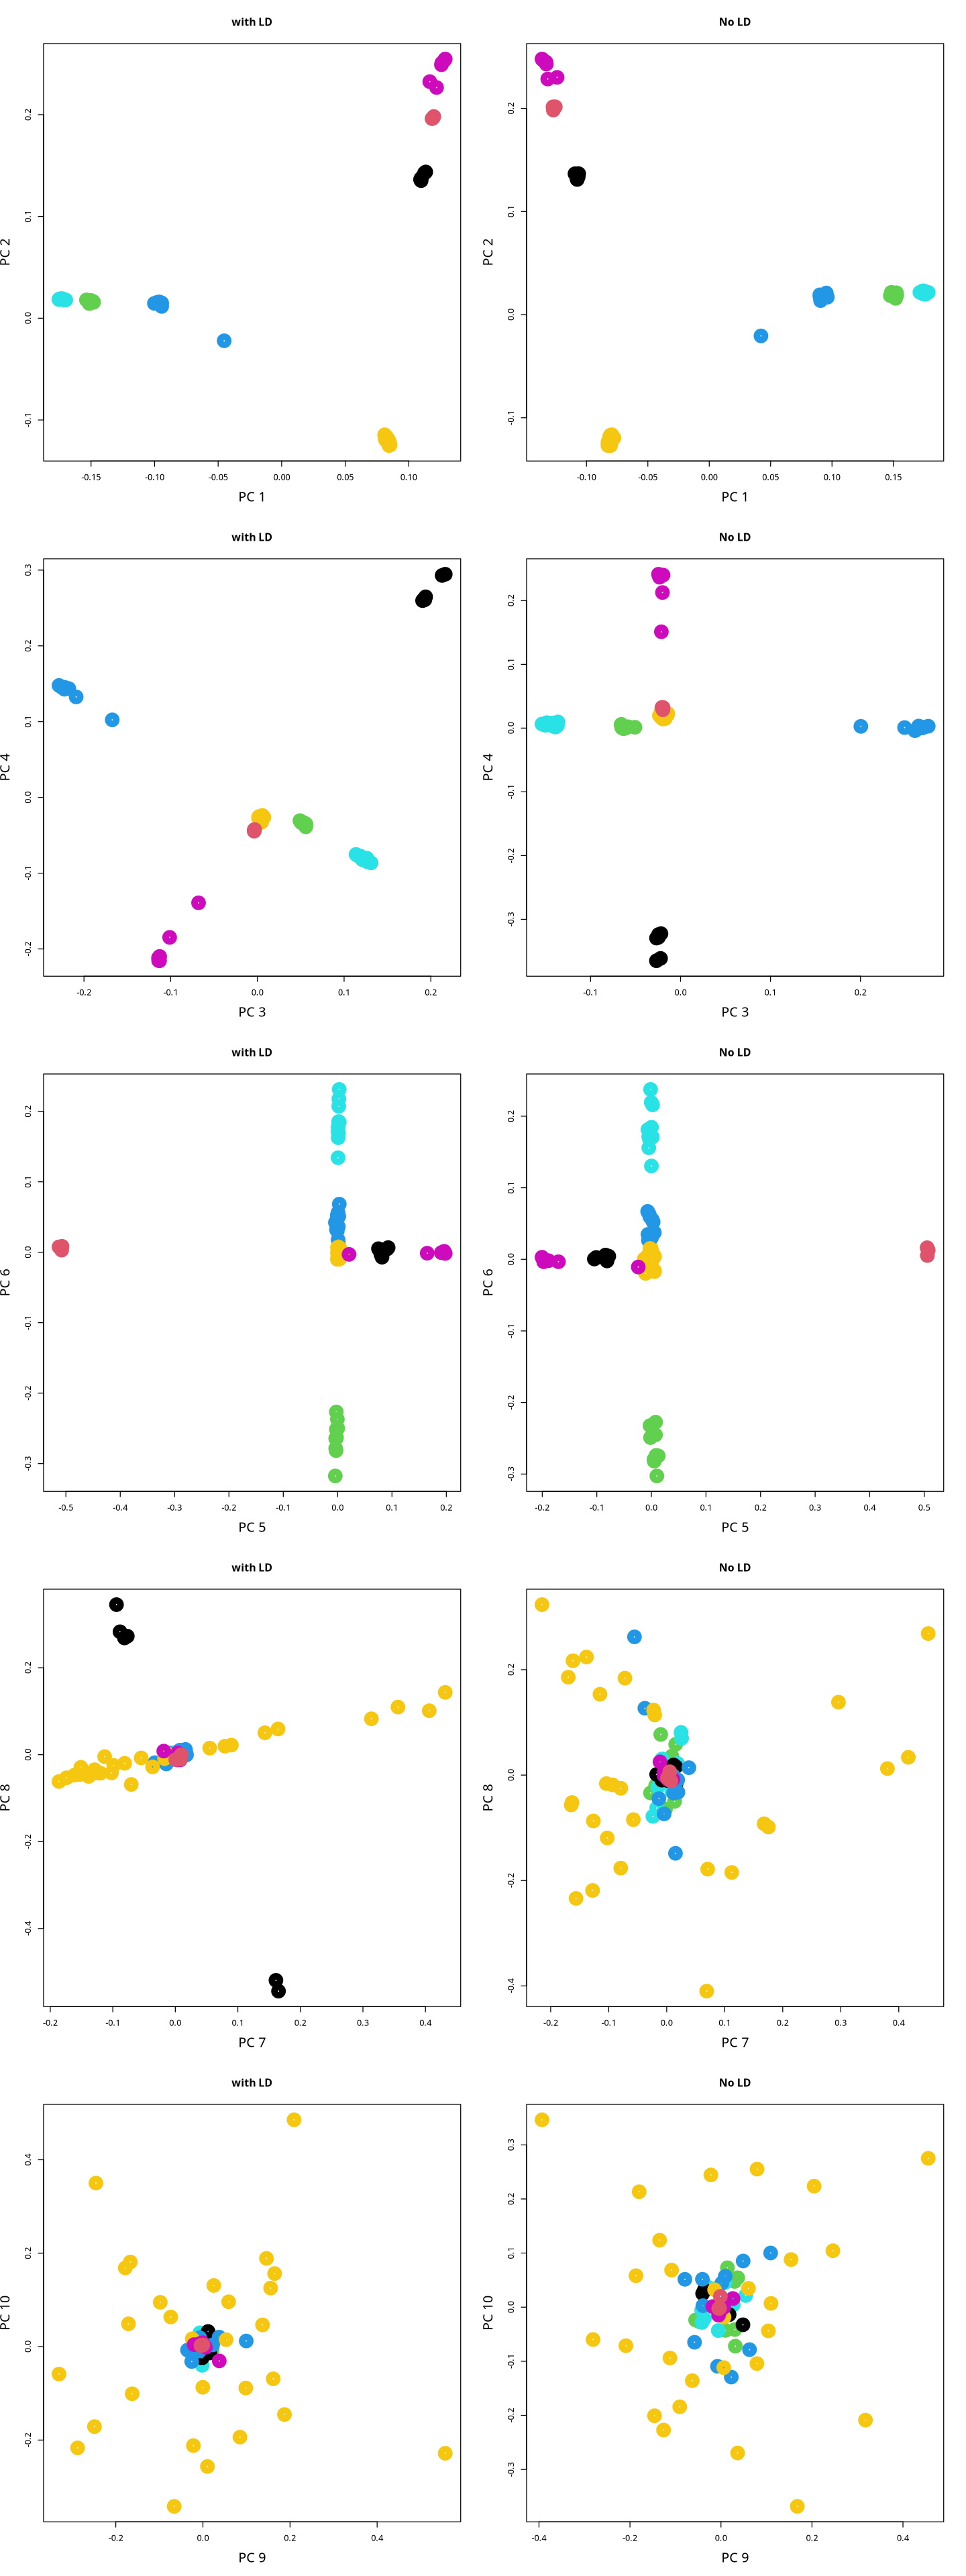

In [14]:
options(repr.plot.width=12, repr.plot.height=32)

tab <- table(pop <- read.table("./pca2/blue_wildebeest_noLD.fam")[,1])


pcaNoLD <- read.table("./pca2/blue_wildebeest_noLD.eigvecs")


par(mfrow=c(5,2))
for(pc in 0:4){
 
    plot(pca[,pc*2+1:2],col=as.factor(pop),ylab=paste("PC",pc*2+2),xlab=paste("PC",pc*2+1),cex.lab=1.5,cex=2,lwd=8,main="with LD")
    plot(pcaNoLD[,pc*2+1:2],col=as.factor(pop),ylab=paste("PC",pc*2+2),xlab=paste("PC",pc*2+1),cex.lab=1.5,cex=2,lwd=8,main="No LD")

    
    }

 - Which of the PCs from prevous analysis capture LD and not population structure?
 - Do you think it is better to perform PCA with out without LD?

## Identity by state tree
As a last minute addition we can also make a neighbour joining tree mentioned in the lecture by first computing identity-by-state distances between individuals which a just the proportion of sites between two individuals where they are different.
We can then load these distances into R and produce a NJ tree with the package APE.


In [15]:
# get IBS distances with plink
plink --allow-extra-chr --bfile ./pca2/blue_wildebeest_thin --distance square 1-ibs --chr-set 29 --threads 2 --out ./pca2/plink


(anders) PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./pca2/plink.log.
Options in effect:
  --allow-extra-chr
  --bfile ./pca2/blue_wildebeest_thin
  --chr-set 29
  --distance square 1-ibs
  --out ./pca2/plink
  --threads 2

515181 MB RAM detected; reserving 257590 MB for main workspace.
990980 variants loaded from .bim file.
73 samples (0 males, 0 females, 73 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ./pca2/plink.nosex .
Using up to 2 threads (change this with --threads).
Before main variant filters, 73 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.999215.
990980 variants and 73 samples pass filters and QC.
Note: No phenotypes present.
Distance matrix calculation complete.
IDs written to ./pca2/plink.mdist.id .
Distances (proportions) written to ./pca2/plink.mdist .
(anders) 


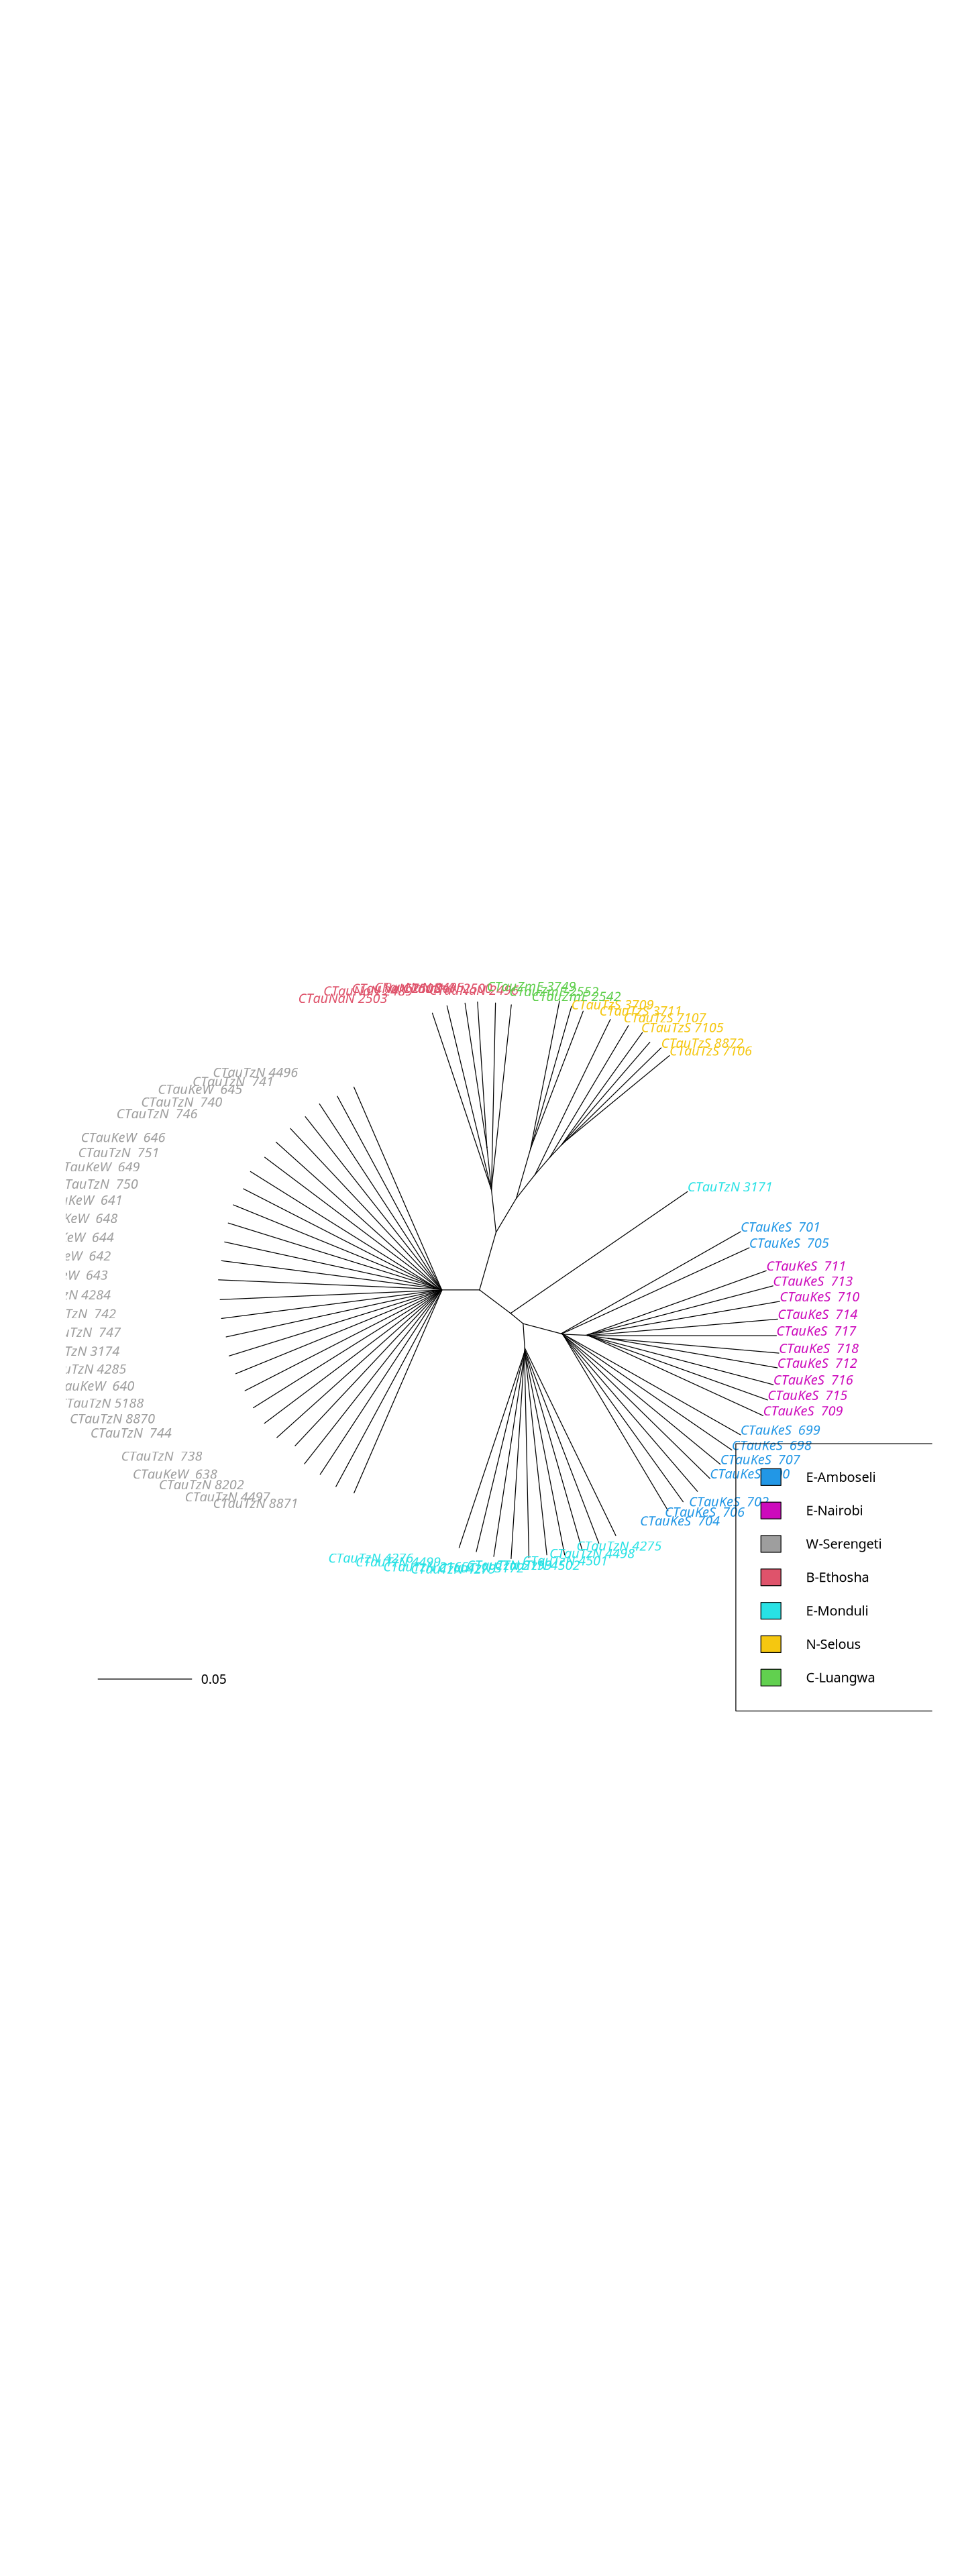

In [16]:
library(ape)

# read in distances
m <- as.matrix(read.table("./pca2/plink.mdist", header = F))

# read id of individuals
id <- read.table("./pca2/plink.mdist.id")
rownames(m) <- id$V2
colnames(m) <- id$V2

pops <- c(4,6,8,2,5,7,3)
names(pops) <- unique(id$V1)

plot(nj(m), tip.color = pops[id$V1], type = "unrooted", show.tip.label = TRUE)
add.scale.bar()
legend("bottomright",
       legend = names(pops),
       fill = pops)

 - Try removing the " type = 'unrooted'," argument from the plotting command above and see what happens to the tree